# Sales Analysis

In [2]:
# Imports

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


plt.style.use('Solarize_Light2')

In [3]:
#Imports
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import metrics
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix


## Importing and EDA

In [4]:
# Reading in data

df = pd.read_csv('saleshourlydaily1.csv', parse_dates=['datum'])

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 449 entries, 0 to 448
Data columns (total 14 columns):
datum                            449 non-null datetime64[ns]
Vosol(Acetic Acid)               449 non-null float64
ketoprofen(propionic acid)       449 non-null float64
Aspirin(Salicylic acid)          449 non-null float64
Paracetamol                      449 non-null float64
Alprazolam(Anxiolytic)           449 non-null int64
Temazepam(Insomnia)              449 non-null int64
Levocitrizine(Asthama)           449 non-null int64
Thyroxine(Thyroid)               449 non-null float64
Year                             449 non-null int64
Month                            449 non-null int64
Hour                             449 non-null int64
Weekday Name                     449 non-null object
Stock Quantity(no.of tablets)    449 non-null int64
dtypes: datetime64[ns](1), float64(5), int64(7), object(1)
memory usage: 49.2+ KB


In [6]:
df.describe()

,Vosol(Acetic Acid),ketoprofen(propionic acid),Aspirin(Salicylic acid),Paracetamol,Alprazolam(Anxiolytic),Temazepam(Insomnia),Levocitrizine(Asthama),Thyroxine(Thyroid),Year,Month,Hour,Stock Quantity(no.of tablets)
count,449.000000,449.000000,449.000000,449.000000,449.000000,449.000000,449.000000,449.000000,449.000000,449.0,449.000000,449.000000
mean,0.180401,0.125523,0.244989,1.315256,0.505568,0.002227,0.213808,0.065033,2020.991091,1.0,11.616927,24.657016
std,0.473402,0.385030,0.586247,2.645189,0.975408,0.047193,1.003870,0.255043,1.326216,0.0,6.914999,14.355746
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2019.000000,1.0,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2020.000000,1.0,6.000000,11.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2021.000000,1.0,12.000000,25.000000
75%,0.000000,0.000000,0.000000,1.200000,1.000000,0.000000,0.000000,0.000000,2022.000000,1.0,18.000000,37.000000
max,4.000000,3.000000,4.000000,17.000000,5.000000,1.000000,10.000000,2.000000,2023.000000,1.0,23.000000,50.000000


In [7]:
df.head()

,datum,Vosol(Acetic Acid),ketoprofen(propionic acid),Aspirin(Salicylic acid),Paracetamol,Alprazolam(Anxiolytic),Temazepam(Insomnia),Levocitrizine(Asthama),Thyroxine(Thyroid),Year,Month,Hour,Weekday Name,Stock Quantity(no.of tablets)
0,2014-01-02 08:00:00,0.0,3.0,2.0,2.0,0,0,0,1.0,2019,1,8,Thursday,10
1,2014-01-02 09:00:00,0.0,0.0,1.0,0.0,2,0,0,0.0,2019,1,9,Thursday,11
2,2014-01-02 10:00:00,0.0,0.0,0.0,3.0,2,0,0,0.0,2019,1,10,Thursday,35
3,2014-01-02 11:00:00,1.0,0.0,0.0,2.0,1,0,0,0.0,2019,1,11,Thursday,23
4,2014-01-02 12:00:00,0.0,2.0,0.0,5.0,2,0,0,0.0,2019,1,12,Thursday,11


In [8]:
df['Day'] = df['datum'].dt.day

# Yearly Sales 

###  Vosol(Acetic Acid)- Anti-inflammatory and antirheumatic products, non-steroids; Acetic acid derivatives and related substances

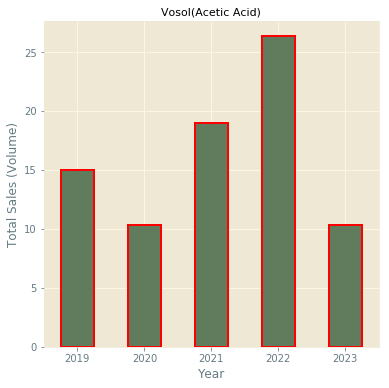

In [9]:
plt.figure(figsize=(6, 6))

df_anti_infla_one = df.groupby(['Year'])['Vosol(Acetic Acid)'].sum()

df_anti_infla_one.plot(kind='bar', color='#607c5c', edgecolor='red', width=0.5, linewidth=2)

plt.title('Vosol(Acetic Acid)', fontdict={'fontsize': 11})
plt.xlabel('Year')
plt.xticks(rotation=0)
plt.ylabel('Total Sales (Volume)')

plt.show()

### ketoprofen(propionic acid) - Anti-inflammatory and antirheumatic products, non-steroids; Propionic acid derivatives

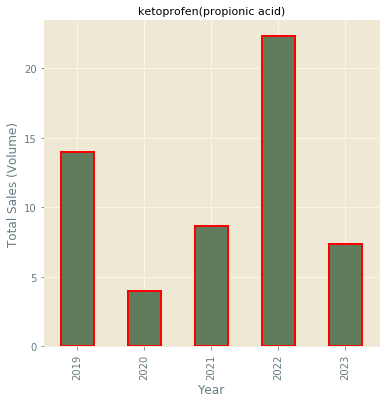

In [10]:
plt.figure(figsize=(6, 6))

df_anti_infla_two = df.groupby(['Year'])['ketoprofen(propionic acid)'].sum()

df_anti_infla_two.plot(kind='bar', color='#607c5c', edgecolor='red', width=0.5, linewidth=2)

plt.title('ketoprofen(propionic acid)', fontdict={'fontsize': 11})
plt.xlabel('Year')
plt.ylabel('Total Sales (Volume)')

plt.show()

### Aspirin(Salicylic acid)- Other analgesics and antipyretics; Salicylic acid and derivatives

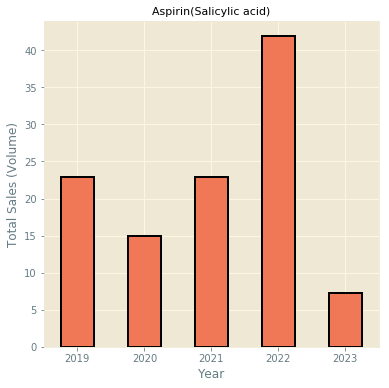

In [11]:
plt.figure(figsize=(6, 6))

df_analgesic = df.groupby(['Year'])['Aspirin(Salicylic acid)'].sum()

df_analgesic.plot(kind='bar', color='#F07857', edgecolor='black', width=0.5, linewidth=2)

plt.title('Aspirin(Salicylic acid)', fontdict={'fontsize': 11})
plt.xlabel('Year')
plt.xticks(rotation=0)
plt.ylabel('Total Sales (Volume)')

plt.show()

### Paracetamol- Other analgesics and antipyretics; Pyrazolones and Anilides

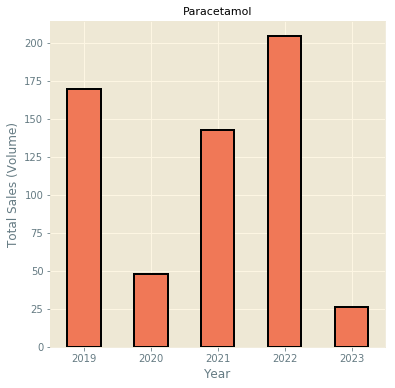

In [12]:
plt.figure(figsize=(6, 6))

df_analgesic_two = df.groupby(['Year'])['Paracetamol'].sum()

df_analgesic_two.plot(kind='bar', color='#F07857', edgecolor='black', width=0.5, linewidth=2)

plt.title('Paracetamol', fontdict={'fontsize': 11})
plt.xlabel('Year')
plt.xticks(rotation=0)
plt.ylabel('Total Sales (Volume)')

plt.show()

### Alprazolam(Anxiolytic)- Psycholeptics drugs, Anxiolytic drugs

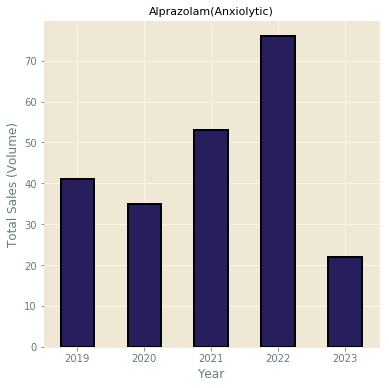

In [13]:
plt.figure(figsize=(6, 6))

df_psych = df.groupby(['Year'])['Alprazolam(Anxiolytic)'].sum()

df_psych.plot(kind='bar', color='#281E5D', edgecolor='black', width=0.5, linewidth=2)

plt.title('Alprazolam(Anxiolytic)', fontdict={'fontsize': 11})
plt.xlabel('Year')
plt.xticks(rotation=0)
plt.ylabel('Total Sales (Volume)')

plt.show()

### Temazepam(Insomnia) - Psycholeptics drugs, Hypnotics and sedatives drugs

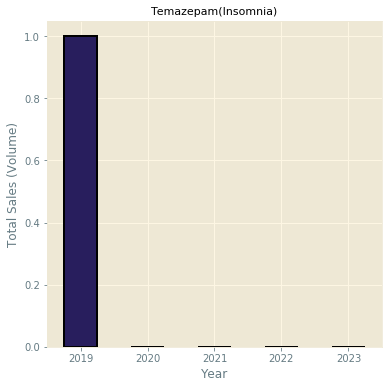

In [14]:
plt.figure(figsize=(6, 6))

df_psych_two = df.groupby(['Year'])['Temazepam(Insomnia)'].sum()

df_psych_two.plot(kind='bar', color='#281E5D', edgecolor='black', width=0.5, linewidth=2)

plt.title('Temazepam(Insomnia)', fontdict={'fontsize': 11})
plt.xlabel('Year')
plt.xticks(rotation=0)
plt.ylabel('Total Sales (Volume)')

plt.show()

### Levocitrizine(Asthama) - Drugs for obstructive airway diseases

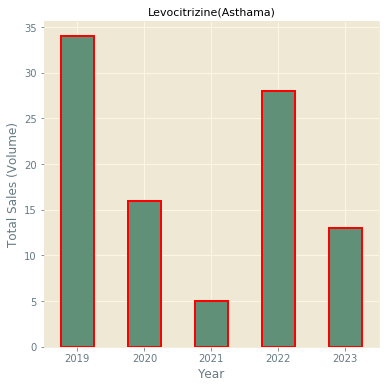

In [15]:
plt.figure(figsize=(6, 6))

df_air = df.groupby(['Year'])['Levocitrizine(Asthama)'].sum()

df_air.plot(kind='bar', color='#609078', edgecolor='red', width=0.5, linewidth=2)

plt.title('Levocitrizine(Asthama)', fontdict={'fontsize': 11} )
plt.xlabel('Year')
plt.xticks(rotation=0)
plt.ylabel('Total Sales (Volume)')

plt.show()

### Thyroxine(Thyroid)- Antihistamines for systemic use

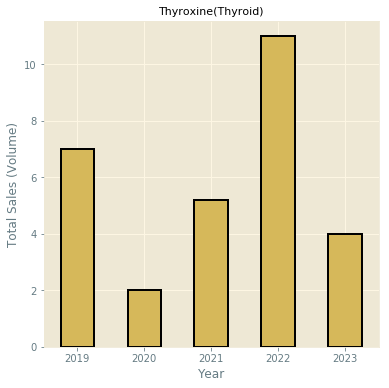

In [16]:
plt.figure(figsize=(6, 6))

df_antihist = df.groupby(['Year'])['Thyroxine(Thyroid)'].sum()

df_antihist.plot(kind='bar', color='#D6B85A', edgecolor='black', width=0.5, linewidth=2)

plt.title('Thyroxine(Thyroid)', fontdict={'fontsize': 11})
plt.xlabel('Year')
plt.xticks(rotation=0)
plt.ylabel('Total Sales (Volume)')

plt.show()

# Monthy Sales Time Series

### Vosol(Acetic Acid) - Anti-inflammatory and antirheumatic products, non-steroids; Acetic acid derivatives and related substances

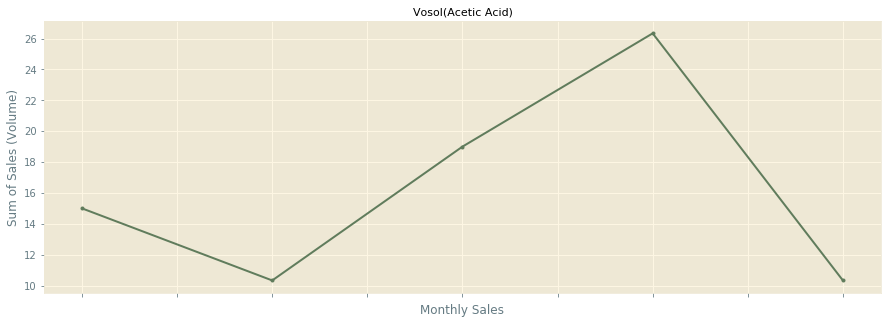

In [17]:
plt.figure(figsize=(15, 5))

df_anti_infla_ts = df.groupby(['Year', 'Month'])['Vosol(Acetic Acid)'].sum()
df_anti_infla_ts.plot(kind='line', color='#607c5c', marker='.')


labels = ['2019', '2020', '2021', '2022', '2023']
plt.title('Vosol(Acetic Acid)', fontdict={'fontsize': 11})
plt.xlabel('Monthly Sales')
plt.ylabel('Sum of Sales (Volume)')


plt.show()

### ketoprofen(propionic acid)- Anti-inflammatory and antirheumatic products, non-steroids; Propionic acid derivatives

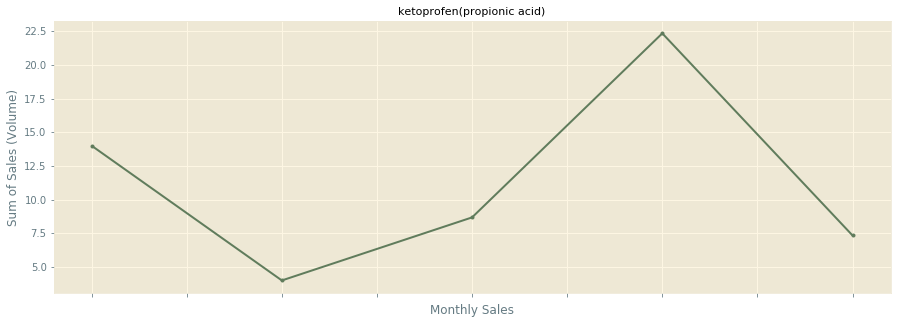

In [18]:
plt.figure(figsize=(15, 5))

df_anti_infla_ts_two = df.groupby(['Year', 'Month'])['ketoprofen(propionic acid)'].sum()
df_anti_infla_ts_two.plot(kind='line', color='#607c5c', marker='.')


labels = ['2019', '2020', '2021', '2022', '2023']
plt.title('ketoprofen(propionic acid)', fontdict={'fontsize': 11})
plt.xlabel('Monthly Sales')
plt.ylabel('Sum of Sales (Volume)')


plt.show()

### Asprin- Other analgesics and antipyretics; Salicylic acid and derivatives


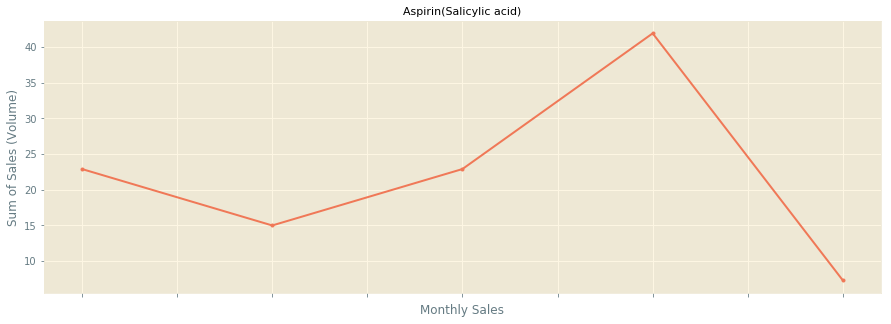

In [19]:
plt.figure(figsize=(15, 5))

df_analgetics_ts = df.groupby(['Year', 'Month'])['Aspirin(Salicylic acid)'].sum()
df_analgetics_ts.plot(kind='line', color='#F07857', marker='.')


labels = ['2019', '2020', '2021', '2022', '2023']

plt.title('Aspirin(Salicylic acid)', fontdict={'fontsize': 11})
plt.xlabel('Monthly Sales')
plt.ylabel('Sum of Sales (Volume)')


plt.show()

### Paracetamol - Other analgesics and antipyretics; Pyrazolones and Anilides

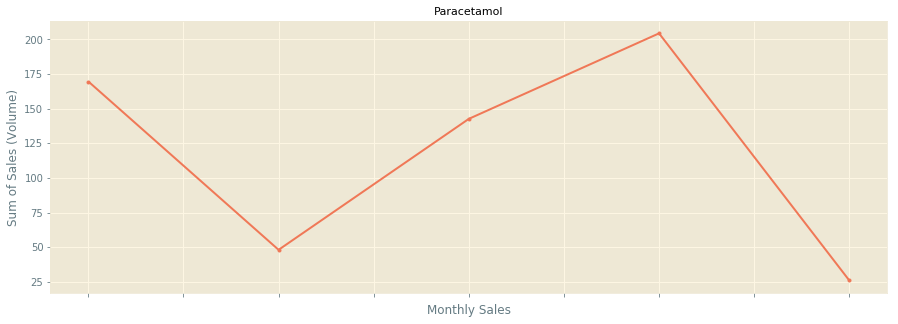

In [20]:
plt.figure(figsize=(15, 5))

df_analgetics_ts_two = df.groupby(['Year', 'Month'])['Paracetamol'].sum()
df_analgetics_ts_two.plot(kind='line', color='#F07857', marker='.')


labels = ['2019', '2020', '2021', '2022', '2023']

plt.title('Paracetamol', fontdict={'fontsize': 11})
plt.xlabel('Monthly Sales')
plt.ylabel('Sum of Sales (Volume)')


plt.show()

### Alprazolam(Anxiolytic) - Psycholeptics drugs, Anxiolytic drugs

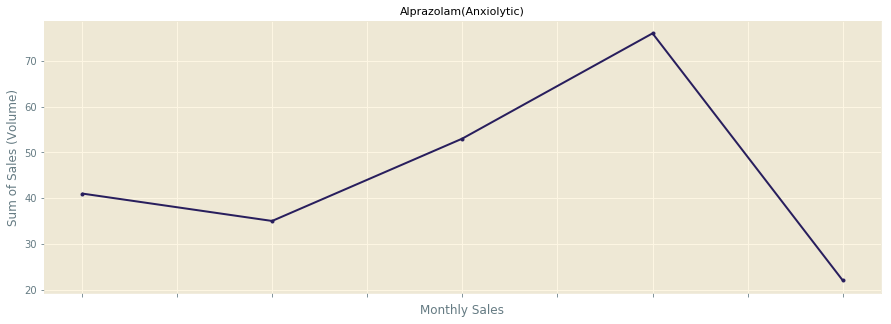

In [21]:
plt.figure(figsize=(15, 5))

df_psych_ts = df.groupby(['Year', 'Month'])['Alprazolam(Anxiolytic)'].sum()
df_psych_ts.plot(kind='line', color='#281E5D', marker='.')


labels = ['2019', '2020', '2021', '2022', '2023']
plt.title('Alprazolam(Anxiolytic)', fontdict={'fontsize': 11})
plt.xlabel('Monthly Sales')
plt.ylabel('Sum of Sales (Volume)')


plt.show()

### Temazepam(Insomnia) - Psycholeptics drugs, Hypnotics and sedatives drugs

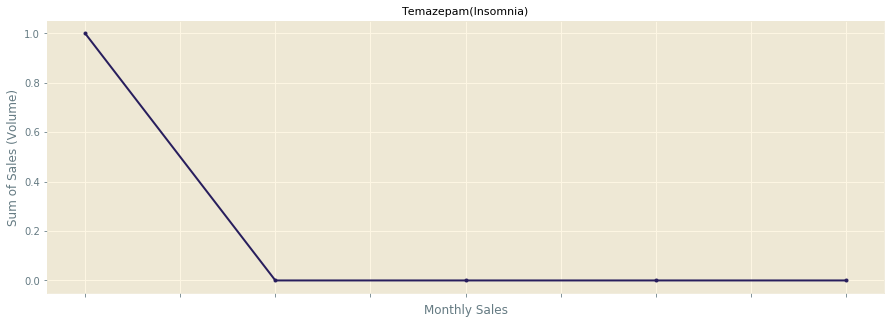

In [22]:
plt.figure(figsize=(15, 5))

df_psych_ts_two = df.groupby(['Year', 'Month'])['Temazepam(Insomnia)'].sum()
df_psych_ts_two.plot(kind='line', color='#281E5D', marker='.')


labels = ['2019', '2020', '2021', '2022', '2023']

plt.title('Temazepam(Insomnia)', fontdict={'fontsize': 11})
plt.xlabel('Monthly Sales')
plt.ylabel('Sum of Sales (Volume)')


plt.show()

### Levocitrizine(Asthama) - Drugs for obstructive airway diseases

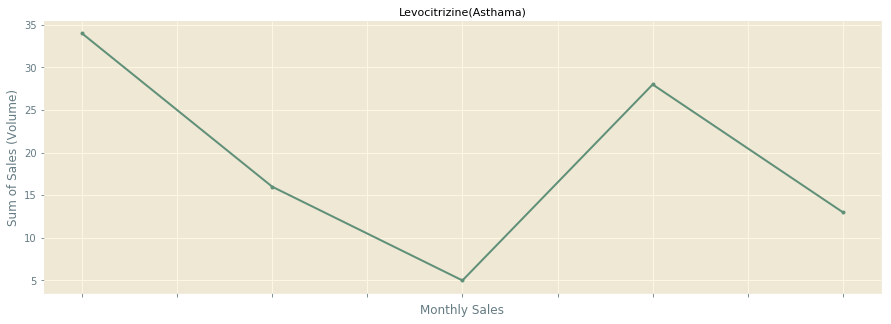

In [23]:
plt.figure(figsize=(15, 5))

df_air = df.groupby(['Year', 'Month'])['Levocitrizine(Asthama)'].sum()
df_air.plot(kind='line', color='#609078', marker='.')


labels = ['2019', '2020', '2021', '2022', '2023']

plt.title('Levocitrizine(Asthama)', fontdict={'fontsize': 11})
plt.xlabel('Monthly Sales')
plt.ylabel('Sum of Sales (Volume)')

plt.show()

### Thyroxine(Thyroid) - Antihistamines for systemic use

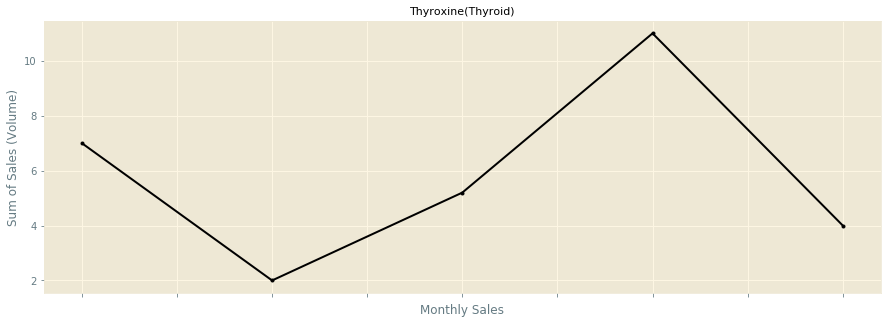

In [24]:
plt.figure(figsize=(15, 5))

df_antihist = df.groupby(['Year', 'Month'])['Thyroxine(Thyroid)'].sum()
df_antihist.plot(kind='line', color='black', marker='.')


labels = ['2019', '2020', '2021', '2022', '2023']

plt.title('Thyroxine(Thyroid)', fontdict={'fontsize': 11})
plt.xlabel('Monthly Sales')
plt.ylabel('Sum of Sales (Volume)')

plt.show()

The months of April, May, and June, respectively, exhibit considerably greater sales numbers in contrast to the other months. Presumably due to the coincidence with allergy season (assuming Northern Hemisphere data origin).

# Monthly Sales Comparison

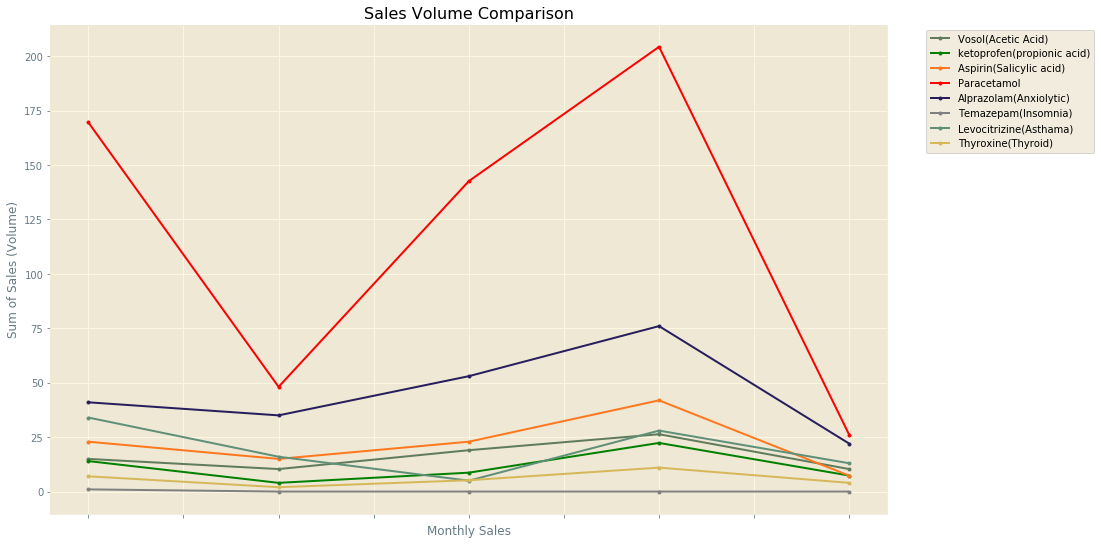

In [25]:
plt.figure(figsize=(15, 9))

df_anti_infla_ts = df.groupby(['Year', 'Month'])['Vosol(Acetic Acid)'].sum()
df_anti_infla_ts.plot(kind='line', color='#607c5c', marker='.')
df_anti_infla_ts_two = df.groupby(['Year', 'Month'])['ketoprofen(propionic acid)'].sum()
df_anti_infla_ts_two.plot(kind='line', color='green', marker='.')
df_analgetics_ts = df.groupby(['Year', 'Month'])['Aspirin(Salicylic acid)'].sum()
df_analgetics_ts.plot(kind='line', color='#ff781f', marker='.')
df_analgetics_ts_two = df.groupby(['Year', 'Month'])['Paracetamol'].sum()
df_analgetics_ts_two.plot(kind='line', color='red', marker='.')
df_psych_ts = df.groupby(['Year', 'Month'])['Alprazolam(Anxiolytic)'].sum()
df_psych_ts.plot(kind='line', color='#281E5D', marker='.')
df_psych_ts_two = df.groupby(['Year', 'Month'])['Temazepam(Insomnia)'].sum()
df_psych_ts_two.plot(kind='line', color='grey', marker='.')
df_air = df.groupby(['Year', 'Month'])['Levocitrizine(Asthama)'].sum()
df_air.plot(kind='line', color='#609078', marker='.')
df_antihist = df.groupby(['Year', 'Month'])['Thyroxine(Thyroid)'].sum()
df_antihist.plot(kind='line', color='#D6B85A', marker='.')


labels = ['2019', '2020', '2021', '2022', '2023']

plt.title('Sales Volume Comparison', fontdict={'fontsize': 16})
plt.xlabel('Monthly Sales')
plt.ylabel('Sum of Sales (Volume)')

plt.legend(bbox_to_anchor=(1.04, 1), loc="upper left")

plt.show()

# Daily Sales Volume


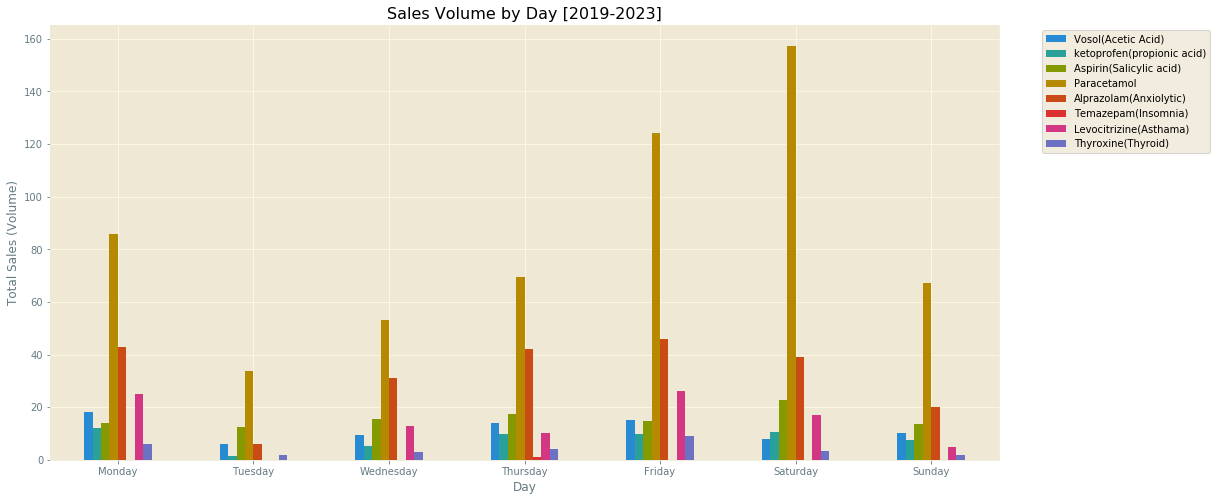

In [26]:
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

df['Weekday Name'] = pd.Categorical(df['Weekday Name'], categories=weekday_order, ordered=True)

df_day = df.groupby('Weekday Name')[df.columns[1:9]].sum()

df_day.plot(kind='bar', figsize=(17, 8))

plt.title('Sales Volume by Day [2019-2023]', fontdict={'fontsize': 16})
plt.xlabel('Day')
plt.xticks(rotation=0)
plt.ylabel('Total Sales (Volume)')
plt.legend(bbox_to_anchor=(1.04, 1), loc="upper left")


plt.show()

In [27]:
X=df.drop(columns=["datum","Year","Month","Hour","Weekday Name"])
y=df["Stock Quantity(no.of tablets)"].values

In [28]:
X_train,X_test,y_train,y_test=train_test_split(X,y)

In [24]:
##SVM

In [29]:
svc_model=SVC(random_state=1)
svc_model.fit(X_train,y_train)
y_pred=svc_model.predict(X_test)
accuracy_svc=svc_model.score(X_test,y_test)
print("SVM accuracy is :",accuracy_svc)

SVM accuracy is : 0.34513274336283184


In [27]:
###RandomForest

In [30]:
model_rf=RandomForestClassifier(max_leaf_nodes=30,random_state=50)
model_rf.fit(X_train,y_train)
pred_y=model_rf.predict(X_test)
print(metrics.accuracy_score(y_test,pred_y))

0.415929203539823


In [ ]:
#LogisticRegression

In [31]:
lr_model=LogisticRegression()
lr_model.fit(X_train,y_train)
lr_pred=lr_model.predict(X_test)
accuracy_lr=lr_model.score(X_test,y_test)
print("Logistic Regression is:",accuracy_lr)

Logistic Regression is: 0.04424778761061947


In [ ]:
#Decision Classifier

In [32]:
dt_model=DecisionTreeClassifier()
dt_model.fit(X_train,y_train)
dt_pred=dt_model.predict(X_test)
accuracy_dt=dt_model.score(X_test,y_test)
print("Decision Classifier accuracy is:",accuracy_dt)

Decision Classifier accuracy is: 0.9646017699115044


In [ ]:
#Naive Bayes

In [33]:
nv_model=GaussianNB()
nv_model.fit(X_train,y_train)
nv_prd=nv_model.predict(X_test)
accuracy_nv=nv_model.score(X_test,y_test)
print("Naive bayes :",accuracy_nv)

Naive bayes : 0.8584070796460177


In [ ]:
#KNN

In [34]:
knn_model=KNeighborsClassifier(n_neighbors=11)
knn_model.fit(X_train,y_train)
knn_pred=knn_model.predict(X_test)
accuracy_knn=knn_model.score(X_test,y_test)
print("Accuracy of KNN:",accuracy_knn)

Accuracy of KNN: 0.2831858407079646
